# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import io
#i tried my best but am only able to make upload file work all other ways were not working on google colab
from google.colab import files
uploaded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [2]:
data_to_train = pd.read_csv(io.BytesIO(uploaded['ionosphere_data.csv']))

data_to_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
#Removing the Useless Features
data_to_train.drop(columns=['feature2'], inplace=True)

In [4]:
data_to_train.rename(columns={'label': 'label'}, inplace=True)
data_to_train['label'] = data_to_train.label.astype('category')
encoding = {'g': 1, 'b': 0}
data_to_train.label.replace(encoding, inplace=True)


In [5]:
data_to_train.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [6]:
data_to_train.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [7]:
x = data_to_train.values[:, :-1]
y = data_to_train.values[:, -1]
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=7)

In [8]:
print(x_train.shape)
print(x_test.shape)

(210, 33)
(141, 33)


In [9]:
# Normalizing the data

mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std

In [10]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(210, 33)
(141, 33)


NameError: ignored

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
                          input_shape =(33,)))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return model
model=build_model()  

In [12]:
history=model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
27/27 [==============================] - 1s 1ms/step - loss: 0.7730 - accuracy: 0.5442
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.7311
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7778
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7652
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.8072
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8055
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8158
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8049
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8155
Epoch 10/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8331
Epoch 11/

In [13]:
historyTest=model.fit(x_test,y_test,epochs=100,batch_size=8)

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9362
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9291
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.9504
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9574
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9716
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9716
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9787
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9787
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9858
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9858
Epoch 11/

In [14]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# 7/7 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9952
# accuracy: 99.52%
# 5/5 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9362
# accuracy: 93.62%

7/7 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.9190
accuracy: 91.90%
5/5 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
accuracy: 100.00%


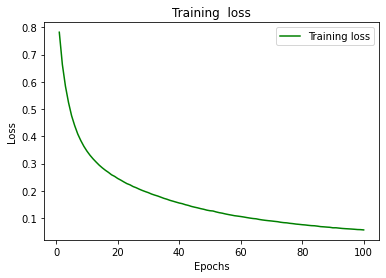

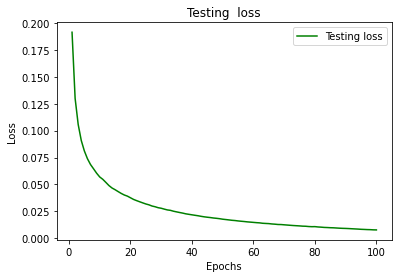

In [15]:
#evaluation and prediction
#Visualizing Training and Validation Loss
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#evaluation and prediction
#Visualizing Testing and Validation Loss
loss_test = historyTest.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_test, 'g', label='Testing loss')
plt.title('Testing  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

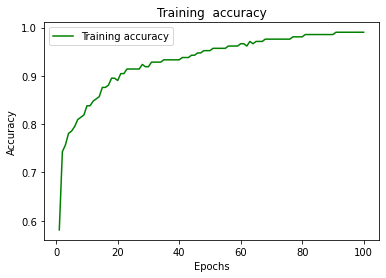

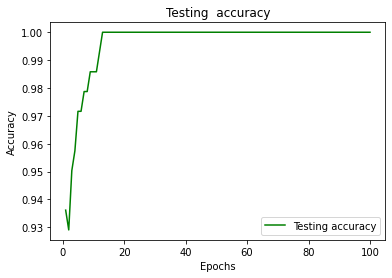

In [16]:

#Visualizing Training and Validation Accuracy
loss_train = history.history['accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Visualizing Training and Validation Accuracy
loss_test = historyTest.history['accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_test, 'g', label='Testing accuracy')

plt.title('Testing  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#perdiction
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score")
print(accuracy_score(y_test, y_pred))

[[45  0]
 [ 0 96]]
accuracy score
1.0
